# Assignment 1 (Stochastic Processes)


## Q1:State your student id and the values of p1, p2, p3, p4.
### Take a 7-digit student number, append a random digit to the end to make it an 8 digit number.
### For p1: we take the first 2 digits of the number and divide by 100. For p2: we take the second 2 digits of the number and divide by 100. For p3: take the third 2 digits of the number and divide by 100. For p4: take the fourth 2 digits of the number and divide by 100.

### Student ID = 3141760, adding a random number '3' to make it 31417603.
P1=31/100 = 0.31, P2=41/100 = 0.41, P3=76/100 = 0.76, P4=03/100 = 0.03

### Normalizing:
To make these probabilities true, we normalize them.
##### Dividing each probability by the sum of all
P(n) = Pn/Sum of Pn. 

Sum=p1+p2+p3+p4 = 0.31+0.41+0.76+0.03 = 1.51

P(norm.)1 = 0.31/1.51 = 0.205,
P(norm.)2 = 0.41/1.51 = 0.271,
P(norm.)3 = 0.76/1.51 = 0.503,
P(norm.)4 = 0.03/1.51 = 0.02,

To check that, we ensure that the sum of the normalized probabilities is 1:
.205+.271+.503+.02 ~=~ 1





## Q2:Some stochastic process, with states labelled A, B, C, D, E, has the following tranisition matrix:

In [10]:
P <- matrix(c(0.18, 0.1, 0.23, 0.02, 0.47,
              0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 1.0, 0.0, 0.0,
              0.31, 0.19, 0.21, "x", 0.13,
              0.22, 0.32, 0.08, 0.28, 0.10), nrow = 5, byrow = TRUE)
P

0.18,0.1,0.23,0.02,0.47
0,1,0,0,0
0,0,1,0,0
0.31,0.19,0.21,x,0.13
0.22,0.32,0.08,0.28,0.1


### (a) Given that the matrix is stochastic matrix, (the sum of each row = 1), find the value of "x":
0.31+0.19+0.21+x+0.13 = 1
### Solving for "x"
x = 1−0.84 = 0.16

0.18,0.10,0.23,0.02,0.47
0.00,1.00,0.00,0.00,0.00
0.00,0.00,1.00,0.00,0.00
0.31,0.19,0.21,0.16,0.13
0.22,0.32,0.08,0.28,0.10



Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




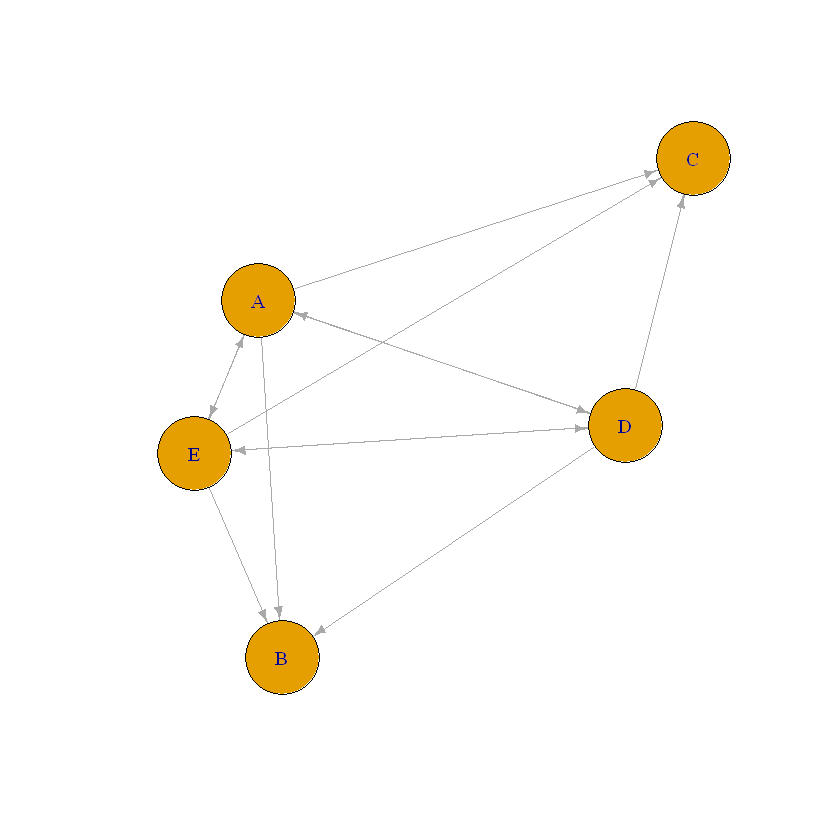

In [1]:
# the "P" matrix hence is:
P <- matrix(c(0.18, 0.1, 0.23, 0.02, 0.47,
              0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 1.0, 0.0, 0.0,
              0.31, 0.19, 0.21, 0.16, 0.13,
              0.22, 0.32, 0.08, 0.28, 0.10), nrow = 5, byrow = TRUE)
P
library(igraph)
# Define node labels
# Create a directed graph
# Plot the state space diagram
nodes <- c("A", "B", "C", "D", "E")
graph <- graph_from_adjacency_matrix(P, mode = "directed", weighted = TRUE, diag = FALSE)


plot(graph, vertex.label = nodes, vertex.size = 30, edge.arrow.size = 0.5)

## (b) Assuming the initial distribution of states is A (13%), B (24%), C (32%), D (28%), and E (3%) calculate the distribution of states after 3 generations:
To calculate the distribution of states after 3 generations, the matrix multiplication is used. The initial distribution of states is represented as a row vector, and by repeatedly multiplying this vector by the transition matrix, we get the distribution after each generation.
### Mathematically: v3 = v0 * P^3

In [2]:
# Define the initial distribution vector
# Calculate the distribution after 3 generations
v0 <- c(0.13, 0.24, 0.32, 0.28, 0.03)
v3 <- v0 %*% P %*% P %*% P

# Result
print(v3)

         [,1]     [,2]      [,3]       [,4]       [,5]
[1,] 0.038977 0.406876 0.4856722 0.02772928 0.04074556


## (c) Rewrite the stochastic matrix P in canonical form:
### To rewrite the stochastic matrix P in canonical form, identifying the matrices R and Q is required, such that: P = R + Q.
### To find R and Q for the given stochastic matrix P:

In [2]:
P <- matrix(c(0.18, 0.1, 0.23, 0.02, 0.47,
              0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 1.0, 0.0, 0.0,
              0.31, 0.19, 0.21, 0.16, 0.13,
              0.22, 0.32, 0.08, 0.28, 0.10), nrow = 5, byrow = TRUE)

# Finding absorbing states (rows with 1 on the diagonal in P)
# Extracting R (absorbing states) and Q (non-absorbing states)
absorbing_states <- which(diag(P) == 1)
R <- P[absorbing_states, absorbing_states]
Q <- P[-absorbing_states, -absorbing_states]

# Print R and Q
cat("R:\n")
print(R)

cat("\nQ:\n")
print(Q)

R:
     [,1] [,2]
[1,]    1    0
[2,]    0    1

Q:
     [,1] [,2] [,3]
[1,] 0.18 0.02 0.47
[2,] 0.31 0.16 0.13
[3,] 0.22 0.28 0.10


Here, R represents the absorbing states, and Q represents the transient states.

## (d) For each state, i, calculate the mean number of times that the process is in a transient state j, given it started in i.
###  The fundamental matrix approach is used. The fundamental matrix N is given by: N = (I-Q)^-1

In [3]:
# Given Q matrix (transient states)
Q <- matrix(c(0.18, 0.02, 0.47,
              0.31, 0.16, 0.13,
              0.22, 0.28, 0.10), nrow = 3, byrow = TRUE)

# Calculate the fundamental matrix N
# Print the fundamental matrix N
N <- solve(diag(3) - Q)
cat("Fundamental Matrix N:\n")
print(N)

# Calculate the mean number of times in each transient state for each initial state
# Print the mean number of times
mean_times <- N - diag(3)
cat("\nMean Number of Times in Transient States:\n")
print(mean_times)


Fundamental Matrix N:
          [,1]      [,2]      [,3]
[1,] 1.5771433 0.3278775 0.8709793
[2,] 0.6741652 1.3908492 0.5529645
[3,] 0.5952642 0.5128565 1.4960506

Mean Number of Times in Transient States:
          [,1]      [,2]      [,3]
[1,] 0.5771433 0.3278775 0.8709793
[2,] 0.6741652 0.3908492 0.5529645
[3,] 0.5952642 0.5128565 0.4960506


## (e) For each state i, find the mean number of transitions before the process hits an absorbing state, given that the process starts in a transient state i.
### We do it using the fundamental matrix N, where Mi = Nij - 1.

In [4]:
# Given Q matrix (transient states)
Q <- matrix(c(0.18, 0.02, 0.47,
              0.31, 0.16, 0.13,
              0.22, 0.28, 0.10), nrow = 3, byrow = TRUE)

# Calculate the fundamental matrix N
# Sum the elements of each row to get the mean number of transitions
N <- solve(diag(3) - Q)
mean_transitions_before_absorbing <- rowSums(N - diag(3))

# Print the mean number of transitions before hitting an absorbing state
cat("Mean Number of Transitions Before Hitting Absorbing State:\n")
print(mean_transitions_before_absorbing)


Mean Number of Transitions Before Hitting Absorbing State:
[1] 1.776000 1.617979 1.604171


## (f) For each state i, find the probability of ending in each of the absorbing states.
### To find the probability of ending in each of the absorbing states for each transient state i, the following formula is used:
### Probability of ending in absorbing state j given starting in transient state i = Nij×Rjj
If the absorbing state matrix R is a diagonal matrix, there is no need to multiply it separately with the fundamental matrix N. The fundamental matrix N already contains the required information.

In [15]:
# Print the probability of ending in each absorbing state for each transient state i (same as N)
cat("Probability of Ending in Absorbing States for Each Transient State i:\n")
print(N)

Probability of Ending in Absorbing States for Each Transient State i:
          [,1]      [,2]      [,3]
[1,] 1.5771433 0.3278775 0.8709793
[2,] 0.6741652 1.3908492 0.5529645
[3,] 0.5952642 0.5128565 1.4960506


## Q3: Simulate a discrete random walk in Z^2 starting at the origin and moving north with probability p1, south with p = p2, east with p = p3, and west with p = p4.
### P1=31/100 = 0.31, P2=41/100 = 0.41, P3=76/100 = 0.76, P4=03/100 = 0.03
### For a simulation of a discrete random walk in the Z square plane with given probabilities for moving in different directions, the simple simulation in R is used: (20 steps)

In [1]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initializing position
  position <- c(0, 0)
  
  # Define possible moves
  moves <- c("North", "South", "East", "West")
  
  # Simulate random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Update position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Print current position
    cat("Step", step, ":", "Current Position =", position, "\n")
  }
  
  return(position)
}

# Use the corrected probabilities from student ID
p1 <- 0.31
p2 <- 0.41
p3 <- 0.76
p4 <- 0.03

# Set number of steps
# Simulate the random walk
num_steps <- 20
final_position <- simulate_random_walk(num_steps, p1, p2, p3, p4)

# Print final position
cat("Final Position after", num_steps, "steps =", final_position, "\n")


Step 1 : Current Position = 1 0 
Step 2 : Current Position = 2 0 
Step 3 : Current Position = 2 -1 
Step 4 : Current Position = 3 -1 
Step 5 : Current Position = 3 0 
Step 6 : Current Position = 4 0 
Step 7 : Current Position = 4 -1 
Step 8 : Current Position = 4 -2 
Step 9 : Current Position = 4 -3 
Step 10 : Current Position = 4 -4 
Step 11 : Current Position = 4 -5 
Step 12 : Current Position = 4 -6 
Step 13 : Current Position = 4 -5 
Step 14 : Current Position = 5 -5 
Step 15 : Current Position = 6 -5 
Step 16 : Current Position = 7 -5 
Step 17 : Current Position = 7 -6 
Step 18 : Current Position = 8 -6 
Step 19 : Current Position = 9 -6 
Step 20 : Current Position = 9 -5 
Final Position after 20 steps = 9 -5 


### (a) Plot 5 realisations of your walk with 2500 steps on the same plot

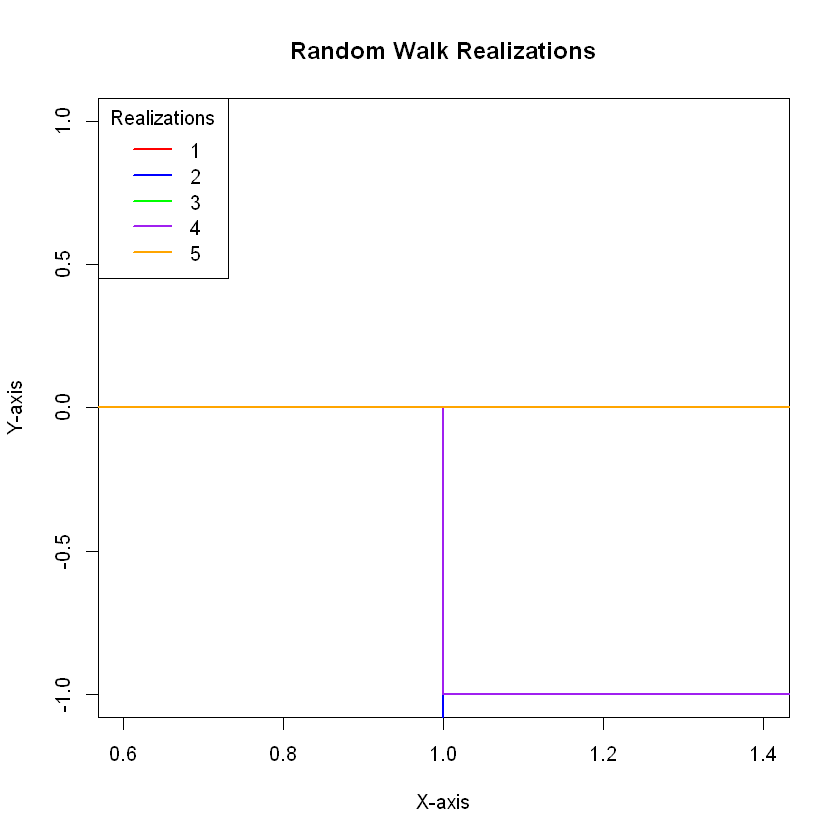

In [2]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initializing the position
  position <- c(0, 0)
  
  # Define all possible moves
  moves <- c("North", "South", "East", "West")
  
  # Stort positions at each step
  positions <- matrix(0, ncol = 2, nrow = steps + 1)
  positions[1, ] <- position
  
  # Simulate the random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Update the position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Stort current position
    positions[step + 1, ] <- position
  }
  
  return(positions)
}

# Set probabilities based on student ID
p1 <- 0.31
p2 <- 0.41
p3 <- 0.76
p4 <- 0.03

# Set number of steps
# Set the number of realizations
num_steps <- 2500
num_realizations <- 5

# Plot 5 realizations on the same plot
colors <- c("red", "blue", "green", "purple", "orange")
plot(0, type = "n", xlab = "X-axis", ylab = "Y-axis", main = "Random Walk Realizations")

for (i in 1:num_realizations) {
  random_walk <- simulate_random_walk(num_steps, p1, p2, p3, p4)
  lines(random_walk[, 1], random_walk[, 2], col = colors[i], lwd = 2)
}

legend("topleft", legend = 1:num_realizations, col = colors, lwd = 2, title = "Realizations")


### (b) Calculate the expected length of the walk after 2500 steps

In [3]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initialize the position
  position <- c(0, 0)
  
  # Define all possible moves
  moves <- c("North", "South", "East", "West")
  
  # Stort positions at each step
  positions <- matrix(0, ncol = 2, nrow = steps + 1)
  positions[1, ] <- position
  
  # Simulate the random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Update the position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Storing current position
    positions[step + 1, ] <- position
  }
  
  return(positions)
}

# Set probabilities based on student ID
p1 <- 0.31
p2 <- 0.41
p3 <- 0.76
p4 <- 0.03

# Set number of steps
# Set the number of walks
num_steps <- 2500
num_walks <- 1000 

# Simulate walks and calculate distances
distances <- numeric(num_walks)
for (i in 1:num_walks) {
  final_position <- simulate_random_walk(num_steps, p1, p2, p3, p4)
  distances[i] <- sqrt(sum(final_position^2))
}

# Calculate the average distance
average_distance <- mean(distances)

# Print the result
cat("Average distance after", num_steps, "steps across", num_walks, "walks:", average_distance, "\n")


Average distance after 2500 steps across 1000 walks: 35229.04 


In [4]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initialize the position
  position <- c(0, 0)
  
  # Define all possible moves
  moves <- c("North", "South", "East", "West")
  
  # Stort positions at each step
  positions <- matrix(0, ncol = 2, nrow = steps + 1)
  positions[1, ] <- position
  
  # Simulate the random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Update the position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Storing current position
    positions[step + 1, ] <- position
  }
  
  return(positions)
}

# Set probabilities based on student ID
p1 <- 0.31
p2 <- 0.41
p3 <- 0.76
p4 <- 0.03

# Set number of steps
# Set the number of walks
num_steps <- 2500
num_walks <- 780

# Simulate walks and calculate distances
distances <- numeric(num_walks)
for (i in 1:num_walks) {
  final_position <- simulate_random_walk(num_steps, p1, p2, p3, p4)
  distances[i] <- sqrt(sum(final_position^2))
}

# Calculate the average distance
average_distance <- mean(distances)

# Print the result
cat("Average distance after", num_steps, "steps across", num_walks, "walks:", average_distance, "\n")


Average distance after 2500 steps across 780 walks: 35213.37 


### Therefore the average distance after 2500 steps across 1000 walks: around 35200
### The 'simulate_random_walk' function simulates a random walk. We run a specified number of walks 'num_walks', and for each walk, we calculate the Euclidean distance of the final position from the starting point. The average distance is calculated then from all the distances obtained in the simulation.

## Q4 A generalised random walk is given by dS = a(x, t)dt + b(x, t)dW, where a(x, t), b(x, t) are given functions of space and time and dW is a Weiner process i.e. δW = ϵ√δt and ϵ is a random number normally distributed with a mean of 0 and a variance of 1.

### (a) Simulate this random walk in 1 dimension with your own choice of a(x, t) and b(x, t)

### For this simulation, we use numerical methods such as Euler-Maruyama method. This method discretizes the differential equation to perform the simulation.

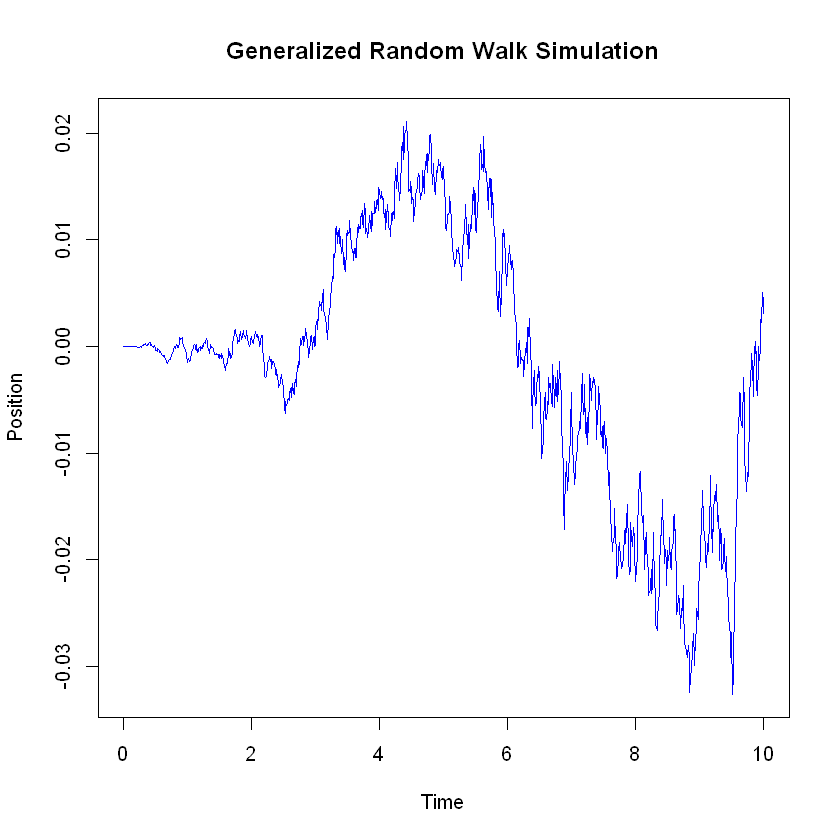

In [5]:
# Parameters
num_steps <- 1000  # Number of time steps
delta_t <- 0.01    # Time step size
epsilon <- rnorm(num_steps, mean = 0, sd = 1) * sqrt(delta_t)  # Wiener process increments

# Function to define a(x, t)
a <- function(x, t) {
  return(0.0025 * x * t) 
}

# Function to define b(x, t)
b <- function(x, t) {
  return(0.04 * sin(x) + 0.0025 * t)  
}

# Initialize arrays to store results
S <- numeric(num_steps + 1)
S[1] <- 0  # Initial condition

# Simulate the random walk
for (i in 1:num_steps) {
  S[i + 1] <- S[i] + a(S[i], i * delta_t) * delta_t + b(S[i], i * delta_t) * epsilon[i]
}

# Plot the results
time <- seq(0, num_steps * delta_t, by = delta_t)
plot(time, S, type = "l", col = "blue", xlab = "Time", ylab = "Position", main = "Generalized Random Walk Simulation")


### (b) Estimate the expected value for the walk after 2500 steps

In [6]:
# Function to simulate a generalized random walk
simulate_generalized_random_walk <- function(num_steps, delta_t, num_simulations) {
  epsilon_matrix <- matrix(rnorm(num_steps * num_simulations, mean = 0, sd = 1) * sqrt(delta_t), nrow = num_simulations)

  # Initialize arrays to store results
  S <- matrix(0, nrow = num_simulations, ncol = num_steps + 1)

  # Simulate random walks
  for (i in 1:num_simulations) {
    for (j in 1:num_steps) {
      S[i, j + 1] <- S[i, j] + a(S[i, j], j * delta_t) * delta_t + b(S[i, j], j * delta_t) * epsilon_matrix[i, j]
    }
  }

  return(S)
}

# Parameters
num_steps <- 2500
num_simulations <- 1000 

# Simulate generalized random walks
simulated_walks <- simulate_generalized_random_walk(num_steps, delta_t, num_simulations)

# Print some diagnostic information
cat("Min final position:", min(simulated_walks[, num_steps + 1]), "\n")
cat("Max final position:", max(simulated_walks[, num_steps + 1]), "\n")

# Calculate the average
average_final_position <- mean(simulated_walks[, num_steps + 1])

# Print the result
cat("Average final position after", num_steps, "steps across", num_simulations, "simulations:", average_final_position, "\n")

Min final position: -0.669764 
Max final position: 1.204799 
Average final position after 2500 steps across 1000 simulations: -0.002343378 


### (c) If the walk starts at x = 0, calculating the probability that x > 0 after 2500 steps

In [7]:
# Calculate the probability that x > 0 after 2500 steps
probability_x_positive <- sum(simulated_walks[, num_steps + 1] > 0) / num_simulations

# Print the result
cat("Probability that x > 0 after", num_steps, "steps across", num_simulations, "simulations:", probability_x_positive, "\n")


Probability that x > 0 after 2500 steps across 1000 simulations: 0.453 


## Q5  simulate a random walk to estimate the value of π using the described approach.

In [8]:
# Function to simulate a random walk and estimate pi
simulate_pi_estimate <- function(num_points) {
  x <- runif(num_points, min = -1, max = 1)
  y <- runif(num_points, min = -1, max = 1)

  # Calculate distances from the origin
 # Count points inside the circle
     # Estimate pi using the ratio
  distances <- sqrt(x^2 + y^2)
points_inside_circle <- sum(distances <= 1)
 pi_estimate <- 4 * points_inside_circle / num_points

  return(pi_estimate)
}

# Number of random walks
num_walks <- 5

# Number of points in each walk
num_points_per_walk <- 11800

# Simulating random walks to estimate pi
pi_estimates <- sapply(1:num_walks, function(i) simulate_pi_estimate(num_points_per_walk))

# Printing the estimated values
cat("Estimated values of pi:", pi_estimates, "\n")


Estimated values of pi: 3.12 3.149831 3.088136 3.137966 3.144407 


### (a) Generating 5 chains, calculating the value of π after a large number of steps
### To generate 5 chains and calculate the value of π after a large number of steps, we modify the previous code to include multiple chains.

In [9]:
# Function to simulate a random walk and estimate pi
simulate_pi_estimate_chain <- function(num_points, burn_in) {
  x <- runif(num_points + burn_in, min = -1, max = 1)
  y <- runif(num_points + burn_in, min = -1, max = 1)

  # Calculate distances from the origin
  distances <- sqrt(x^2 + y^2)

  # Discard burn-in samples
  distances <- distances[(burn_in + 1):(num_points + burn_in)]

  # Count points inside the circle
  points_inside_circle <- sum(distances <= 1)

  # Estimate pi using the ratio
  pi_estimate <- 4 * points_inside_circle / num_points

  return(pi_estimate)
}

# Number of chains
num_chains <- 5

# Number of points and burn-in for each chain
num_points_per_chain <- 11000
burn_in_per_chain <- 1100

# Simulate multiple chains to estimate pi
pi_estimates_chain <- sapply(1:num_chains, function(i) simulate_pi_estimate_chain(num_points_per_chain, burn_in_per_chain))

# Print the estimated values
cat("Estimated values of pi for each chain:", pi_estimates_chain, "\n")


Estimated values of pi for each chain: 3.134909 3.125091 3.153091 3.156 3.119273 


### (b) Calculating an estimate for π and giving an estimate of the error.

In [10]:
# Calculate the overall estimate of pi
overall_pi_estimate <- mean(pi_estimates_chain)

# Calculate the standard deviation of the estimates
pi_estimate_std <- sd(pi_estimates_chain)

# Calculate the error (standard deviation / sqrt(number of chains))
error_estimate <- pi_estimate_std / sqrt(num_chains)

# Print the results
cat("Overall estimate of pi:", overall_pi_estimate, "\n")
cat("Standard deviation of estimates:", pi_estimate_std, "\n")
cat("Error estimate:", error_estimate, "\n")


Overall estimate of pi: 3.137673 
Standard deviation of estimates: 0.01641729 
Error estimate: 0.007342033 
